In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
tips = pd.read_csv('tips.csv',sep=',')

In [79]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\Users\João\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


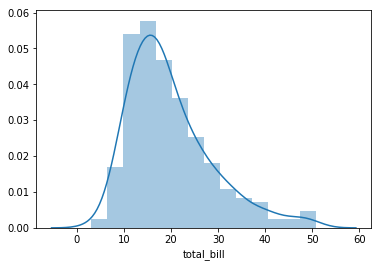

In [98]:
sns.distplot(tips['total_bill'] )

C:\Users\João\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\João\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


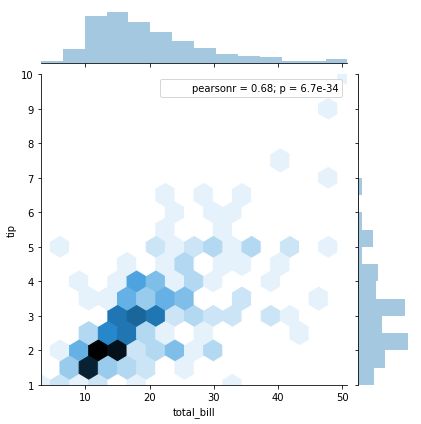

In [91]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

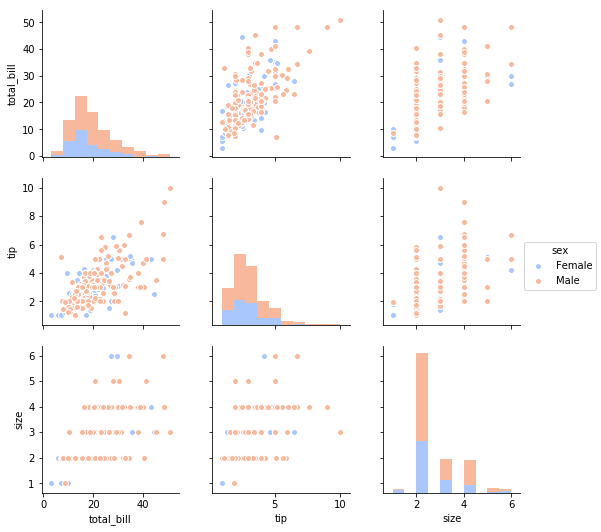

In [94]:
sns.pairplot(tips, hue='sex', palette='coolwarm')

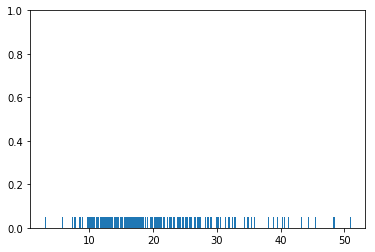

In [97]:
sns.rugplot(tips['total_bill'])

(0, 1)

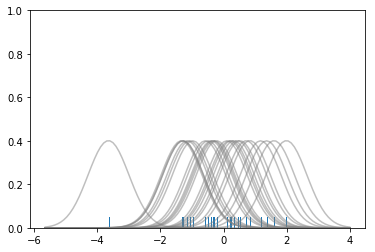

In [100]:
# Não se preocupe em entender este código!
# É apenas para o diagrama abaixo
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Cria o dataset
dataset = np.random.randn(25)

# Cria outro rugplot
sns.rugplot(dataset);

# Configure o eixo dos x para o gráfico
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 pontos igualmente espaçados de x_min para x_max
x_axis = np.linspace(x_min,x_max,100)

# Configure a largura de banda. Para obter informações sobre isso:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2

# Crie uma lista de kernel vazia
kernel_list = []

# Traça cada função de base
for data_point in dataset:
    
    # Crie um kernel para cada ponto e acrescente à lista
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Ajusta a escala para plotar
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

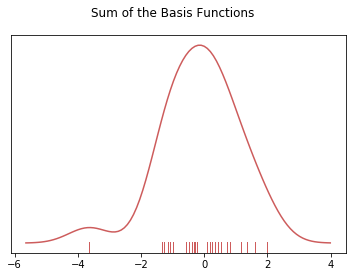

In [101]:
# Para obter o gráfico do kde podemos somar essas funções de base.

# Traça a soma da função de base
sum_of_kde = np.sum(kernel_list,axis=0)

# Plota a figura
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Adiciona o rugplot inicial
sns.rugplot(dataset,c = 'indianred')

# Livrar-se das marcas de "y-tick"
plt.yticks([])

# Define o título
plt.suptitle("Sum of the Basis Functions")

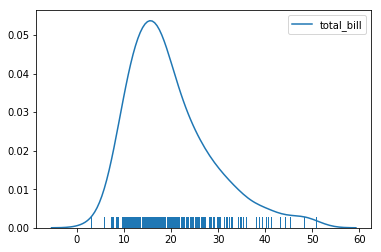

In [104]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])